## Import required library

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generating Synthetic Data with Correlation

In [17]:
'''The following Python code generates synthetic data with
a specified correlation between two variables
and stores it in a NumPy array.'''

xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2, stds[0]*stds[1]*corr],[stds[0]*stds[1]*corr,stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

## Creating a DataFrame

In [18]:
df=pd.DataFrame()

## Populate the DataFrame with synthetic data

In [19]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [20]:
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


## Scatter Plot of Experience vs. Salary

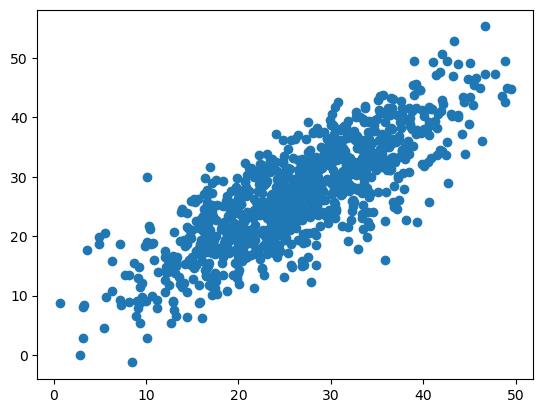

In [21]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

## Extract feature and target variables

In [22]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

## Checking the Shapes of Feature and Target Variables

In [23]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


## Perform train-test split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


## Creating a Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

## Training a Linear Regression Model

In [29]:
regressor.fit(X_train,y_train)

LinearRegression()

## Making Predictions with the Linear Regression Model

In [30]:
y_pred=regressor.predict(X_test)

## Linear Regression Model Coefficients

In [31]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient
print(regressor.coef_[0])

# Y intercept
print(regressor.intercept_)

0.8263082971217046
5.2052952839157705


## Creating a DataFrame for Error Analysis

In [35]:
df_error=pd.DataFrame()
df_error['y_test'] = y_test
df_error['y_pred'] = y_pred
df_error.shape

(200, 2)

In [36]:
df_error

,y_test,y_pred
0,24.131012,27.113082
1,19.352516,16.821209
2,24.134761,24.346756
3,36.778521,36.113030
4,29.907187,13.561817
...,...,...
195,-1.276342,12.245980
196,32.032653,32.342357
197,9.143705,15.862546
198,27.195526,25.383755


## Mean Absolute Error

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.3217019100743705

## Mean Squared Error

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

30.041486376198137

## Root Mean Squared Error

In [39]:
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

5.481011437335096

## Calculating the R-squared (R2) Score

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6485975310536726

## Visualising the regression line

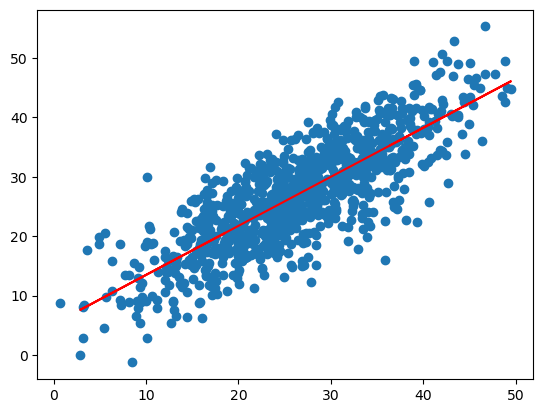

In [41]:
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])